#### Library

In [1]:
import pandas as pd
# Set pandas options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)

# from xgboost import XGBRegressor
import sklearn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from catboost import CatBoostRegressor

#### Data Loading

In [2]:
# df2019 = pd.read_csv('/home/kevin/Downloads/BESS/data/raw/2019/merged_df_2019_cleaned.csv')
df2020 = pd.read_csv('/home/kevin/Downloads/BESS/data/raw/2020/merged_df_2020_cleaned.csv')
df2021 = pd.read_csv('/home/kevin/Downloads/BESS/data/raw/2021/merged_df_2021_cleaned.csv')
df2022 = pd.read_csv('/home/kevin/Downloads/BESS/data/raw/2022/merged_df_2022_cleaned.csv')
df2023 = pd.read_csv('/home/kevin/Downloads/BESS/data/raw/2023/merged_df_2023_cleaned.csv')
df2024 = pd.read_csv('/home/kevin/Downloads/BESS/data/raw/2024/merged_df_2024_cleaned.csv')

In [3]:
# print(df2019.shape)
print(df2020.shape)
print(df2021.shape)
print(df2022.shape)
print(df2023.shape)
print(df2024.shape)

(8787, 69)
(8763, 69)
(8763, 69)
(8763, 69)
(8787, 69)


In [4]:
df = pd.concat([df2020, df2021, df2022, df2023, df2024], axis=0, ignore_index=True) #df2019

In [5]:
df.shape

(43863, 69)

In [6]:
df.head()

,datetime_,alberta_internal_load,forecast_alberta_internal_load,pool_price,forecast_pool_price,rolling_30day_avg_price,solar_generation,temp_calgary,temp_edmonton,temp_fortmc,wind_generation,ws_calgary,ws_edmonton,ws_fortmc,hour_of_day,day_of_week,day_of_month,week_of_month,month,year,is_winter,pool_price_lag_1,pool_price_lag_2,pool_price_lag_3,pool_price_lag_4,pool_price_lag_5,pool_price_lag_6,pool_price_lag_7,pool_price_lag_8,pool_price_lag_9,pool_price_lag_10,pool_price_lag_11,pool_price_lag_12,pool_price_lag_13,pool_price_lag_14,pool_price_lag_15,pool_price_lag_16,pool_price_lag_17,pool_price_lag_18,pool_price_lag_19,pool_price_lag_20,pool_price_lag_21,pool_price_lag_22,pool_price_lag_23,pool_price_lag_24,alberta_internal_load_lag_1,alberta_internal_load_lag_2,alberta_internal_load_lag_3,alberta_internal_load_lag_4,alberta_internal_load_lag_5,alberta_internal_load_lag_6,alberta_internal_load_lag_7,alberta_internal_load_lag_8,alberta_internal_load_lag_9,alberta_internal_load_lag_10,alberta_internal_load_lag_11,alberta_internal_load_lag_12,alberta_internal_load_lag_13,alberta_internal_load_lag_14,alberta_internal_load_lag_15,alberta_internal_load_lag_16,alberta_internal_load_lag_17,alberta_internal_load_lag_18,alberta_internal_load_lag_19,alberta_internal_load_lag_20,alberta_internal_load_lag_21,alberta_internal_load_lag_22,alberta_internal_load_lag_23,alberta_internal_load_lag_24
0,2020-01-01 00:00:00,9467.0,9688.0,30.24,28.79,43.49,0.0,2.2,-0.6,-2.7,875.637983,10.0,11.0,7.0,0,2,1,1,1,2020,1,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0
1,2020-01-01 01:00:00,9361.0,9541.0,29.43,28.19,43.49,0.0,1.4,1.1,-4.6,778.695505,7.0,11.0,3.0,1,2,1,1,1,2020,1,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0
2,2020-01-01 02:00:00,9286.0,9410.0,29.66,31.19,43.49,0.0,2.5,1.3,-7.0,717.339528,8.0,11.0,6.0,2,2,1,1,1,2020,1,29.43,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,9361.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0
3,2020-01-01 03:00:00,9209.0,9328.0,28.19,28.19,43.49,0.0,1.4,0.2,-5.2,691.670863,3.0,11.0,0.0,3,2,1,1,1,2020,1,29.66,29.43,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,9286.0,9361.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0
4,2020-01-01 04:00:00,9195.0,9319.0,31.17,28.19,43.49,0.0,-0.3,0.4,-4.1,553.970998,0.0,11.0,4.0,4,2,1,1,1,2020,1,28.19,29.66,29.43,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,30.24,9209.0,9286.0,9361.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0,9467.0


In [7]:
# Check for missing values
df.isnull( ).sum().sort_values(ascending=False)

alberta_internal_load_lag_24      0
pool_price_lag_4                  0
month                             0
year                              0
is_winter                         0
pool_price_lag_1                  0
pool_price_lag_2                  0
pool_price_lag_3                  0
pool_price_lag_5                  0
pool_price_lag_13                 0
pool_price_lag_6                  0
pool_price_lag_7                  0
pool_price_lag_8                  0
pool_price_lag_9                  0
pool_price_lag_10                 0
pool_price_lag_11                 0
week_of_month                     0
day_of_month                      0
day_of_week                       0
hour_of_day                       0
ws_fortmc                         0
ws_edmonton                       0
ws_calgary                        0
wind_generation                   0
temp_fortmc                       0
temp_edmonton                     0
temp_calgary                      0
solar_generation            

#### Train-Test split

In [8]:
# Convert datetime_ column to datetime type
df['datetime_'] = pd.to_datetime(df['datetime_'])

# Filter data for the first 11 months
train_data = df[df['datetime_'] < '2024-07-01']
test_data = df[df['datetime_'] >= '2024-07-01']

# Define independent variables (features) and target variable
X_train = train_data.drop(columns=['datetime_', 'pool_price'])
y_train = train_data['pool_price']
# Display the shapes of the training data
print(X_train.shape, y_train.shape)

# Define independent variables (features) and target variable
X_test = test_data.drop(columns=['datetime_', 'pool_price'])
y_test = test_data['pool_price']
# Display the shapes of the test data
print(X_test.shape, y_test.shape)

(39444, 67) (39444,)
(4419, 67) (4419,)


#### Model Training

In [9]:
# Initialize the CatBoost regressor
catboost_regressor = CatBoostRegressor(iterations=5000, learning_rate=0.1, depth=6, loss_function='RMSE')

# # Specify the categorical features
# categorical_features = ['season'] 

# Train the model
catboost_regressor.fit(X_train, y_train, verbose=100) #cat_features=categorical_features, 

# Display the model
print(catboost_regressor)

0:	learn: 148.6168777	total: 110ms	remaining: 9m 9s
100:	learn: 49.4870290	total: 3.59s	remaining: 2m 53s
200:	learn: 45.5365131	total: 6.96s	remaining: 2m 46s
300:	learn: 42.3987409	total: 9.89s	remaining: 2m 34s
400:	learn: 39.9326391	total: 12.8s	remaining: 2m 26s
500:	learn: 37.8745343	total: 15.7s	remaining: 2m 21s
600:	learn: 36.1286650	total: 18.8s	remaining: 2m 17s
700:	learn: 34.4312814	total: 22.1s	remaining: 2m 15s
800:	learn: 32.9645012	total: 24.7s	remaining: 2m 9s
900:	learn: 31.5522909	total: 27.4s	remaining: 2m 4s
1000:	learn: 30.3134026	total: 30s	remaining: 1m 59s
1100:	learn: 29.1497800	total: 32.8s	remaining: 1m 56s
1200:	learn: 28.0310443	total: 35.4s	remaining: 1m 52s
1300:	learn: 26.9896360	total: 38.5s	remaining: 1m 49s
1400:	learn: 25.9408536	total: 41.3s	remaining: 1m 46s
1500:	learn: 25.0134610	total: 44s	remaining: 1m 42s
1600:	learn: 24.1968061	total: 46.7s	remaining: 1m 39s
1700:	learn: 23.4484600	total: 49.3s	remaining: 1m 35s
1800:	learn: 22.6796965	tota

#### Train Inference

In [10]:
# Make predictions on the training data
y_train_pred = catboost_regressor.predict(X_train)

# Calculate mean squared error for training data
train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Train Mean Squared Error: {train_mse}")

mae = mean_absolute_error(y_train, y_train_pred)
print(f"Train Mean Absolute Error: {mae}")

# Calculate R^2 score for training data
train_r2 = r2_score(y_train, y_train_pred)
print(f"Train R^2 Score: {train_r2}")

Train Mean Squared Error: 92.88077904687037
Train Mean Absolute Error: 5.721089562705336
Train R^2 Score: 0.9964512215358822


#### Test Inference

In [11]:
# Make predictions on the test data
y_test_pred = catboost_regressor.predict(X_test)

# Calculate mean squared error for test data
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test Mean Squared Error: {test_mse}")

test_mae = mean_absolute_error(y_test, y_test_pred)
print(f"Test Mean Absolute Error: {test_mae}")

# Calculate R^2 score for test data
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test R^2 Score: {test_r2}")

Test Mean Squared Error: 2126.8684715030245
Test Mean Absolute Error: 22.034830064126265
Test R^2 Score: 0.8441607961161564


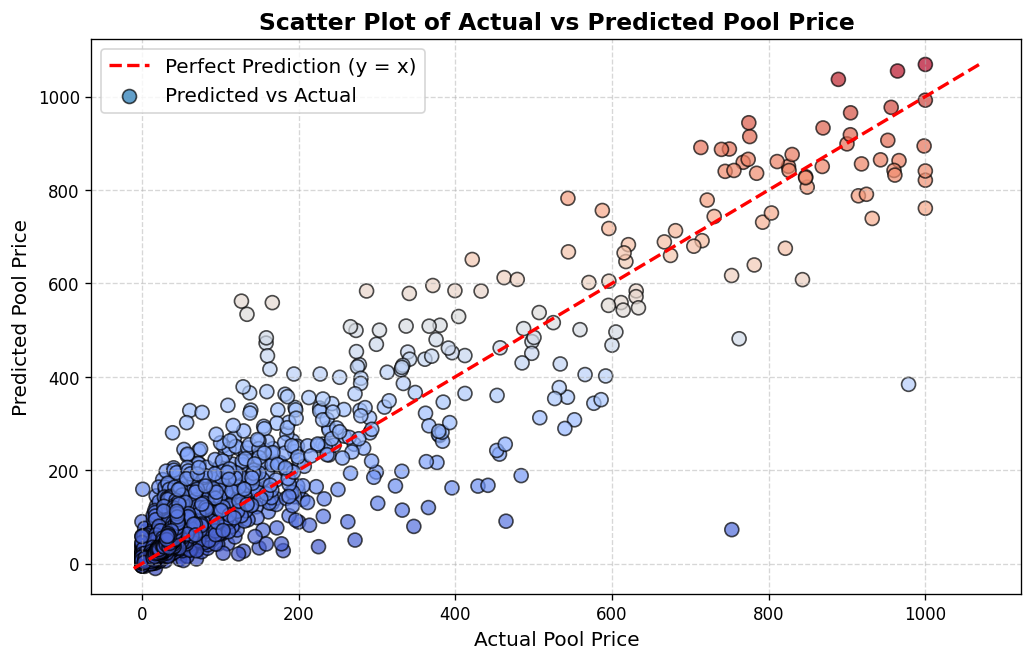

In [12]:
# Generate values for the y = x reference line
min_val = min(min(y_test), min(y_test_pred))
max_val = max(max(y_test), max(y_test_pred))
line_values = np.linspace(min_val, max_val, 100)

# Create the scatter plot
plt.figure(figsize=(10, 6), dpi=120)

# Use color gradient for better visibility
plt.scatter(y_test, y_test_pred, alpha=0.7, c=y_test_pred, cmap='coolwarm', edgecolors='k', s=70, label='Predicted vs Actual')

# Plot the y = x line
plt.plot(line_values, line_values, color='red', linestyle='--', linewidth=2, label='Perfect Prediction (y = x)')

# Add labels and title
plt.xlabel('Actual Pool Price', fontsize=12)
plt.ylabel('Predicted Pool Price', fontsize=12)
plt.title('Scatter Plot of Actual vs Predicted Pool Price', fontsize=14, fontweight='bold')

# Add a legend
plt.legend(fontsize=12, loc='upper left')

# Add grid with transparency
plt.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()


In [13]:
# Create a dataframe of the actual and predicted values
results_df = pd.DataFrame({'y_test':y_test, 'y_test_pred':y_test_pred.flatten()})
results_df.head()

,y_test,y_test_pred
39443,14.69,13.098125
39444,16.23,16.321047
39445,15.77,14.779117
39446,13.85,11.436767
39447,13.58,13.236117


In [14]:
terget_df = results_df[results_df['y_test'] <= 200]

mae = mean_absolute_error(terget_df.y_test, terget_df.y_test_pred)
r2 = r2_score(terget_df.y_test, terget_df.y_test_pred)

print('terget_df shape:', terget_df.shape)
print(f'Mean Absolute Error on the test set : {mae}')
print(f"R² Score test set: {r2}")

terget_df shape: (4203, 2)
Mean Absolute Error on the test set : 17.677038878257505
R² Score test set: -0.22425124767578186


In [15]:
terget_df = results_df[results_df['y_test'] > 200]

mae = mean_absolute_error(terget_df.y_test, terget_df.y_test_pred)
r2 = r2_score(terget_df.y_test, terget_df.y_test_pred)

print('terget_df shape:', terget_df.shape)
print(f'Mean Absolute Error on the test set : {mae}')
print(f"R² Score test set: {r2}")

terget_df shape: (216, 2)
Mean Absolute Error on the test set : 106.83018355582253
R² Score test set: 0.6636307011284179
